## Comp 6934 Winter 2025 Note 4

These notes are modified from notes by Dr. Terrance Tricco.

by E Brown.

In this notebook, we will do more on the pandas data library and focus on the following concepts:
- data aggregation and grouping
  
Data sets:

* <https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset>
    * You only need the CA file for this notebook examples

## Import libraries

In [1]:
import pandas as pd

pd.set_option('display.max_rows', 100)

## Load data

In [2]:
df = pd.read_csv('datasets/CA_videos.csv')

## Review of last lecture

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72384 entries, 0 to 72383
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           72384 non-null  object
 1   publish_time       72384 non-null  object
 2   trending_date      72384 non-null  object
 3   title              72384 non-null  object
 4   channel_title      72384 non-null  object
 5   channel_id         72384 non-null  object
 6   category_id        72384 non-null  int64 
 7   tags               72384 non-null  object
 8   views              72384 non-null  int64 
 9   likes              72384 non-null  int64 
 10  dislikes           72384 non-null  int64 
 11  comment_count      72384 non-null  int64 
 12  thumbnail_link     72384 non-null  object
 13  comments_disabled  72384 non-null  bool  
 14  ratings_disabled   72384 non-null  bool  
 15  description        72031 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,72384.000000,7.238400e+04,7.238400e+04,72384.0,7.238400e+04
mean,18.858035,2.319453e+06,9.891207e+04,0.0,6.664522e+03
std,6.678511,6.633408e+06,3.374453e+05,0.0,2.933449e+04
min,1.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,17.000000,4.197602e+05,1.476100e+04,0.0,9.700000e+02
50%,20.000000,8.211090e+05,3.259450e+04,0.0,2.081000e+03
75%,24.000000,1.814720e+06,7.656575e+04,0.0,4.637000e+03
max,29.000000,1.507443e+08,1.082681e+07,0.0,1.245627e+06


In [5]:
df['video_id'].nunique()

13191

In [6]:
df['channel_title'].unique()

array(['Brawl Stars', 'WWE', 'Liverpool FC', ..., 'madelineargy',
       'SBS Drama', 'WPRI'], shape=(3780,), dtype=object)

In [7]:
df['video_id'].value_counts()

video_id
rwGpzW8xz-U    12
-VSq4JcmCCI    12
Km5dhtguybM    11
UUKdUNMgk7Q    11
w1-jss2mZlY    11
               ..
6ZwBHQH61QU     1
B-HF-wBwQsc     1
FyJUNqBHxd8     1
P_x5JmRcV8k     1
Dl0McRU95js     1
Name: count, Length: 13191, dtype: int64

In [8]:
df['channel_title'].value_counts().head(50)

channel_title
NBA                           342
DAZN Canada                   276
SPORTSNET                     260
HYBE LABELS                   244
FORMULA 1                     219
JYP Entertainment             193
The United Stand              189
Genshin Impact                188
First We Feast                186
HopeScope                     177
Ryan Trahan                   176
MrBeast                       167
Dude Perfect                  158
Veritasium                    158
SQUEEZIE                      157
Tom Scott                     157
Nintendo of America           156
Kurzgesagt – In a Nutshell    154
Practical Engineering         154
Eamon & Bec                   153
SMTOWN                        150
Grian                         149
The Game Theorists            147
aCookieGod                    146
Netflix                       146
BANGTANTV                     146
NFL                           145
DaFuq!?Boom!                  143
Gurky                         140


In [9]:
df['like_ratio'] = df['likes'] / df['views']

In [10]:
df.describe()

/home/brown/courses/6934/jupenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,category_id,views,likes,dislikes,comment_count,like_ratio
count,72384.000000,7.238400e+04,7.238400e+04,72384.0,7.238400e+04,7.238400e+04
mean,18.858035,2.319453e+06,9.891207e+04,0.0,6.664522e+03,inf
std,6.678511,6.633408e+06,3.374453e+05,0.0,2.933449e+04,NaN
min,1.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,17.000000,4.197602e+05,1.476100e+04,0.0,9.700000e+02,2.197610e-02
50%,20.000000,8.211090e+05,3.259450e+04,0.0,2.081000e+03,4.212674e-02
75%,24.000000,1.814720e+06,7.656575e+04,0.0,4.637000e+03,6.371896e-02
max,29.000000,1.507443e+08,1.082681e+07,0.0,1.245627e+06,inf


In [11]:
df = df[df.views > 0]

In [12]:
df = df.dropna()

In [13]:
df.describe()

,category_id,views,likes,dislikes,comment_count,like_ratio
count,72025.000000,7.202500e+04,7.202500e+04,72025.0,7.202500e+04,72025.000000
mean,18.850816,2.325230e+06,9.900115e+04,0.0,6.656826e+03,0.047143
std,6.685599,6.648131e+06,3.380313e+05,0.0,2.938603e+04,0.033156
min,1.000000,2.307600e+04,0.000000e+00,0.0,0.000000e+00,0.000000
25%,17.000000,4.205630e+05,1.479600e+04,0.0,9.710000e+02,0.021962
50%,20.000000,8.219680e+05,3.259700e+04,0.0,2.081000e+03,0.042096
75%,24.000000,1.818534e+06,7.651800e+04,0.0,4.627000e+03,0.063640
max,29.000000,1.507443e+08,1.082681e+07,0.0,1.245627e+06,0.329747


In [14]:
df[(df.channel_title == 'Nintendo of America')]

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio
5003,iwoE9sXGd_U,2023-01-25T14:00:33Z,2023-01-26T00:00:00Z,GoldenEye 007 - Nintendo 64 - Nintendo Switch ...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,GoldenEye 007 Nintendo 64|GoldenEye 007 Ninten...,490356,16403,0,3145,https://i.ytimg.com/vi/iwoE9sXGd_U/default.jpg,False,False,GoldenEye 007 is back! Originally released for...,0.033451
5225,iwoE9sXGd_U,2023-01-25T14:00:33Z,2023-01-27T00:00:00Z,GoldenEye 007 - Nintendo 64 - Nintendo Switch ...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,GoldenEye 007 Nintendo 64|GoldenEye 007 Ninten...,649839,18129,0,3561,https://i.ytimg.com/vi/iwoE9sXGd_U/default.jpg,False,False,GoldenEye 007 is back! Originally released for...,0.027898
5456,iwoE9sXGd_U,2023-01-25T14:00:33Z,2023-01-28T00:00:00Z,GoldenEye 007 - Nintendo 64 - Nintendo Switch ...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,GoldenEye 007 Nintendo 64|GoldenEye 007 Ninten...,699067,18609,0,3708,https://i.ytimg.com/vi/iwoE9sXGd_U/default.jpg,False,False,GoldenEye 007 is back! Originally released for...,0.026620
5691,iwoE9sXGd_U,2023-01-25T14:00:33Z,2023-01-29T00:00:00Z,GoldenEye 007 - Nintendo 64 - Nintendo Switch ...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,GoldenEye 007 Nintendo 64|GoldenEye 007 Ninten...,729245,19026,0,3767,https://i.ytimg.com/vi/iwoE9sXGd_U/default.jpg,False,False,GoldenEye 007 is back! Originally released for...,0.026090
5936,iwoE9sXGd_U,2023-01-25T14:00:33Z,2023-01-30T00:00:00Z,GoldenEye 007 - Nintendo 64 - Nintendo Switch ...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,GoldenEye 007 Nintendo 64|GoldenEye 007 Ninten...,731828,19256,0,3840,https://i.ytimg.com/vi/iwoE9sXGd_U/default.jpg,False,False,GoldenEye 007 is back! Originally released for...,0.026312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63469,RLgXk2xy79c,2023-11-14T17:25:51Z,2023-11-17T00:00:00Z,Indie World Showcase 11.14.2023 - Nintendo Switch,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,713988,21054,0,1341,https://i.ytimg.com/vi/RLgXk2xy79c/default.jpg,False,False,Check out a selection of indie games from arou...,0.029488
63701,RLgXk2xy79c,2023-11-14T17:25:51Z,2023-11-18T00:00:00Z,Indie World Showcase 11.14.2023 - Nintendo Switch,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,721096,21290,0,1358,https://i.ytimg.com/vi/RLgXk2xy79c/default.jpg,False,False,Check out a selection of indie games from arou...,0.029525
63929,RLgXk2xy79c,2023-11-14T17:25:51Z,2023-11-19T00:00:00Z,Indie World Showcase 11.14.2023 - Nintendo Switch,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,729025,21415,0,1373,https://i.ytimg.com/vi/RLgXk2xy79c/default.jpg,False,False,Check out a selection of indie games from arou...,0.029375
64126,RLgXk2xy79c,2023-11-14T17:25:51Z,2023-11-20T00:00:00Z,Indie World Showcase 11.14.2023 - Nintendo Switch,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,735842,21560,0,1387,https://i.ytimg.com/vi/RLgXk2xy79c/default.jpg,False,False,Check out a selection of indie games from arou...,0.029300


In [15]:
df[(df['channel_title'] == 'Nintendo of America') & (df['title'].str.contains("Mario"))]

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio
12201,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-03T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,777828,38271,0,5112,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.049202
12424,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-04T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,950769,41705,0,5582,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.043864
12663,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-05T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,1051322,43725,0,5827,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.041590
12890,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-06T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,1112754,44826,0,5996,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.040284
13126,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-07T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,1147613,45422,0,6100,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.039580
13348,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-08T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,1182675,45935,0,6233,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.038840
13581,mg-YQ1k57Gg,2023-03-02T14:00:24Z,2023-03-09T00:00:00Z,Mario Kart 8 Deluxe – Booster Course Pass Wave...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,1217239,46376,0,6343,https://i.ytimg.com/vi/mg-YQ1k57Gg/default.jpg,False,False,Rev those engines for Wave 4 of the #MarioKart...,0.038099
34396,JStAYvbeSHc,2023-06-21T14:44:34Z,2023-06-22T00:00:00Z,Super Mario Bros. Wonder - Nintendo Direct 6.2...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,24,nintendo|game|gameplay|fun|video game|action|a...,3026285,139189,0,17945,https://i.ytimg.com/vi/JStAYvbeSHc/default.jpg,False,False,Super Mario Bros. Wonder is releasing for Nint...,0.045993
34420,0r5PJx7rlds,2023-06-21T14:14:45Z,2023-06-22T00:00:00Z,Super Mario RPG - Nintendo Direct 6.21.2023,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,20,nintendo|game|gameplay|fun|video game|action|a...,1635043,68324,0,7621,https://i.ytimg.com/vi/0r5PJx7rlds/default.jpg,False,False,Super Mario RPG is releasing for Nintendo Swit...,0.041787
34599,JStAYvbeSHc,2023-06-21T14:44:34Z,2023-06-23T00:00:00Z,Super Mario Bros. Wonder - Nintendo Direct 6.2...,Nintendo of America,UCGIY_O-8vW4rfX98KlMkvRg,24,nintendo|game|gameplay|fun|video game|action|a...,4060057,163105,0,20830,https://i.ytimg.com/vi/JStAYvbeSHc/default.jpg,False,False,Super Mario Bros. Wonder is releasing for Nint...,0.040173


## Drop Duplicates

Some videos are are trending for multiple days. Perhaps we should only keep 1 entry per video to avoid duplication.

In [16]:
df[df.video_id == 'KKO84c6SbfY']

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio
70188,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-21T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,824606,53665,0,1518,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.065080
70398,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-22T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,1429745,76814,0,2009,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.053726
70610,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-23T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,1851856,94857,0,2312,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.051223
70838,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-24T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2161129,108401,0,2505,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.050159
71036,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-25T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2284654,116801,0,2652,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.051124
71267,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-26T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2440042,124394,0,2764,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.050980
71490,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-27T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2549702,130262,0,2839,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.051089
71707,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-28T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2629272,134336,0,2920,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.051092
71920,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-29T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2698478,137432,0,2982,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.050929
72141,KKO84c6SbfY,2023-12-20T14:00:30Z,2023-12-30T00:00:00Z,Ryan Gosling & Mark Ronson - I'm Just Ken (Mer...,Atlantic Records,UCe4LM_eKc9ywRmVuBm5pjQg,10,atlantic records|Ryan Gosling|I'm Just Ken|Bar...,2764758,140327,0,3029,https://i.ytimg.com/vi/KKO84c6SbfY/default.jpg,False,False,Ken The EP Available Everywhere!Download/Strea...,0.050756


There are multiple choices about how to reduce the data to a single entry per video.
- Should we keep only the first day it went trending?
- Should we keep the last day?
- Should we average its data over the days it was trending?

Let's compare the different approaches to see how they affect some of our statistics.

In [17]:
df[['likes', 'views', 'comment_count', 'like_ratio']].describe()

,likes,views,comment_count,like_ratio
count,7.202500e+04,7.202500e+04,7.202500e+04,72025.000000
mean,9.900115e+04,2.325230e+06,6.656826e+03,0.047143
std,3.380313e+05,6.648131e+06,2.938603e+04,0.033156
min,0.000000e+00,2.307600e+04,0.000000e+00,0.000000
25%,1.479600e+04,4.205630e+05,9.710000e+02,0.021962
50%,3.259700e+04,8.219680e+05,2.081000e+03,0.042096
75%,7.651800e+04,1.818534e+06,4.627000e+03,0.063640
max,1.082681e+07,1.507443e+08,1.245627e+06,0.329747


First, let's sort the DataFrame by trending date. The first day a video went trending will appear first.

In [18]:
df = df.sort_values(by='trending_date', ascending=True)

In [19]:
df

,video_id,publish_time,trending_date,title,channel_title,channel_id,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,like_ratio
0,xGd_HhPYX4A,2022-12-31T11:00:28Z,2023-01-01T00:00:00Z,The Brawlies 2022 - Brawl Stars Community Awar...,Brawl Stars,UCooVYzDxdwTtGYAkcPmOgOw,20,brawl stars|mobile game|mobile strategy game|m...,5212906,222661,0,12098,https://i.ytimg.com/vi/xGd_HhPYX4A/default.jpg,False,False,Download NOW!! ►► https://supr.cl/2K62CZGBe a ...,0.042713
127,mEoPwcrX1U4,2022-12-24T16:00:31Z,2023-01-01T00:00:00Z,I Bought the WORST Pokemon Christmas Presents,Purplecliffe,UCrer50j4M2Lv9wda2ZpqzRA,20,purplecliffe|pokemon|cursed products|weird pok...,648984,24116,0,2555,https://i.ytimg.com/vi/mEoPwcrX1U4/default.jpg,False,False,We bought the absolute WORST Pokemon Christmas...,0.037160
128,2X_GgUhvAbE,2022-12-24T03:09:26Z,2023-01-01T00:00:00Z,i became an italian farmer,Ice Cream Sandwich,UCOsATJw-IZgqGT8MFrHjKGg,23,[None],1836342,178020,0,5864,https://i.ytimg.com/vi/2X_GgUhvAbE/default.jpg,False,False,Download and play The Battle Cats for free: ht...,0.096943
129,q04GS_YvWr4,2022-12-23T15:00:09Z,2023-01-01T00:00:00Z,Assala & Asma Lmnawar ... Sid Lghram - Video C...,Rotana,UCNhqvQMXIgRfjAGmxQqdNRw,10,Arabic|Arab|Tarab|Music|Song|Rotana|روتانا|عرب...,7543656,174242,0,36843,https://i.ytimg.com/vi/q04GS_YvWr4/default.jpg,False,False,كلمات : محمد المغربي ، ألحان : المهدي مزين إشت...,0.023098
130,JW7PV8cfiiM,2022-12-25T15:00:15Z,2023-01-01T00:00:00Z,The King's Christmas Broadcast 2022 👑🎄📺 - BBC,BBC,UCCj956IF62FbT7Gouszaj9w,24,BBC iPlayer|British TV|Watch UK TV Online|Unit...,593459,11428,0,1952,https://i.ytimg.com/vi/JW7PV8cfiiM/default.jpg,False,False,Subscribe and 🔔 to the BBC 👉 https://bit.ly/BB...,0.019257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72253,NtHShhx0LcY,2023-12-26T20:00:08Z,2023-12-31T00:00:00Z,Courage and the Big Meanie,Doobus Goobus,UC2d0Cp7XABGb3zpomS0d-WA,1,courage the cowardly dog|christmas|eustace|mur...,523095,82307,0,3557,https://i.ytimg.com/vi/NtHShhx0LcY/default.jpg,False,False,Courage the cowardly dog is mistreated by the ...,0.157346
72254,sUzlW7n9tzY,2023-12-26T20:00:27Z,2023-12-31T00:00:00Z,WHAT I GOT FOR CHRISTMAS (+18TH BIRTHDAY HAUL)...,Nicole Laeno,UCr1nLIQFpNV5DxD22qxGsyQ,26,[None],664762,36258,0,3385,https://i.ytimg.com/vi/sUzlW7n9tzY/default.jpg,False,False,happy vlogmas day 25! ♥️🎄MERRY CHRISTMAS!! wel...,0.054543
72255,Ibk0O7JfIkE,2023-12-25T18:00:08Z,2023-12-31T00:00:00Z,I Built MY HOUSE Out Of LEGO,Half-Asleep Chris,UCq4qiifOaFGW3a2oljSfxUg,22,[None],1073202,25196,0,1295,https://i.ytimg.com/vi/Ibk0O7JfIkE/default.jpg,False,False,Fundraising Page: https://www.charitywater.org...,0.023477
72245,Ignr0g9ZHB0,2023-12-25T18:30:09Z,2023-12-31T00:00:00Z,Open Thoughts with Nicki Minaj,Open Thoughts,UCNWHllkNIWv1MSvKcOzLsow,24,[None],3084972,115893,0,11802,https://i.ytimg.com/vi/Ignr0g9ZHB0/default.jpg,False,False,Use code MARCO for $20 off your first SeatGeek...,0.037567


Let's ``drop_duplicates()`` keeping the first entry (first day it went trending) and separately the last entry (last day it was trending).

In [20]:
df2 = df.drop_duplicates(subset='video_id', keep='first')[['likes', 'views', 'comment_count', 'like_ratio']]
df2.describe()

,likes,views,comment_count,like_ratio
count,1.312500e+04,1.312500e+04,1.312500e+04,13125.000000
mean,6.724453e+04,1.342799e+06,4.848992e+03,0.053850
std,2.155240e+05,3.655668e+06,2.096594e+04,0.039587
min,0.000000e+00,2.307600e+04,0.000000e+00,0.000000
25%,1.121100e+04,2.959990e+05,7.840000e+02,0.023676
50%,2.407900e+04,5.413810e+05,1.668000e+03,0.047699
75%,5.403900e+04,1.116860e+06,3.601000e+03,0.072883
max,7.114845e+06,9.146389e+07,1.086344e+06,0.329747


In [21]:
df3 = df.drop_duplicates(subset='video_id', keep='last')[['likes', 'views', 'comment_count', 'like_ratio']]
df3.describe()

,likes,views,comment_count,like_ratio
count,1.312500e+04,1.312500e+04,1.312500e+04,13125.000000
mean,9.614840e+04,2.516121e+06,6.330156e+03,0.042793
std,3.177821e+05,7.028770e+06,2.713508e+04,0.030084
min,0.000000e+00,2.590500e+04,0.000000e+00,0.000000
25%,1.511300e+04,4.726850e+05,9.710000e+02,0.019603
50%,3.385800e+04,9.282140e+05,2.082000e+03,0.038155
75%,7.776900e+04,2.012759e+06,4.601000e+03,0.058096
max,1.082681e+07,1.507443e+08,1.245627e+06,0.261526


The average number of likes and views are higher if we keep the last entries. This makes sense as videos will accumulate more likes and views as time goes on.

However, notice that the average ratio of likes to views tends to go down over time, from 0.054 to 0.043. The median also drops from 0.048 to 0.038.

Let's filter our data set to keep the last entry.

In [22]:
df = df.drop_duplicates(subset='video_id', keep='last')

## Aggregation

**Try to avoid using for loops with pandas.** You should rarely, if ever, need to write a loop over your data set.

Almost everything you will need to do to a Series or DataFrame in a batch way can be done much more simply through pandas. It comes with a number of functions for most common actions.

For example, just as ``describe()`` gave us summary statistics of our data set, we can calculate each of those individually.

Here are some statistical properties about the number of views.

In [23]:
df.describe()

,category_id,views,likes,dislikes,comment_count,like_ratio
count,13125.000000,1.312500e+04,1.312500e+04,13125.0,1.312500e+04,13125.000000
mean,18.831771,2.516121e+06,9.614840e+04,0.0,6.330156e+03,0.042793
std,6.600353,7.028770e+06,3.177821e+05,0.0,2.713508e+04,0.030084
min,1.000000,2.590500e+04,0.000000e+00,0.0,0.000000e+00,0.000000
25%,17.000000,4.726850e+05,1.511300e+04,0.0,9.710000e+02,0.019603
50%,20.000000,9.282140e+05,3.385800e+04,0.0,2.082000e+03,0.038155
75%,24.000000,2.012759e+06,7.776900e+04,0.0,4.601000e+03,0.058096
max,29.000000,1.507443e+08,1.082681e+07,0.0,1.245627e+06,0.261526


In [24]:
df['views'].sum()

np.int64(33024089293)

In [25]:
df['views'].mean()

np.float64(2516121.088990476)

In [26]:
df['views'].median()

np.float64(928214.0)

In [27]:
df['views'].std()

np.float64(7028769.86960695)

This can also be combined with filtering and slicing to apply to subsets of the data.

In [28]:
df[df.channel_title == 'Nintendo of America']['views'].mean()

np.float64(2297217.08)

In [29]:
df[df['channel_title'] == 'Nintendo of America']['views'].describe()

count    2.500000e+01
mean     2.297217e+06
std      2.275113e+06
min      2.341270e+05
25%      7.097290e+05
50%      9.896970e+05
75%      4.172861e+06
max      8.139792e+06
Name: views, dtype: float64

## Apply custom functions

If you ever need to do something that pandas doesn't offer on its own, you can also use ``apply()`` to call user-defined functions on your data. Let's take a look.

In [30]:
def squared(x):
    return x * x

In [31]:
df['views']

133       498242
179       383511
180       632756
181      1408932
182      1969001
          ...   
72253     523095
72254     664762
72255    1073202
72245    3084972
72383    3433936
Name: views, Length: 13125, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13125 entries, 133 to 72383
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           13125 non-null  object 
 1   publish_time       13125 non-null  object 
 2   trending_date      13125 non-null  object 
 3   title              13125 non-null  object 
 4   channel_title      13125 non-null  object 
 5   channel_id         13125 non-null  object 
 6   category_id        13125 non-null  int64  
 7   tags               13125 non-null  object 
 8   views              13125 non-null  int64  
 9   likes              13125 non-null  int64  
 10  dislikes           13125 non-null  int64  
 11  comment_count      13125 non-null  int64  
 12  thumbnail_link     13125 non-null  object 
 13  comments_disabled  13125 non-null  bool   
 14  ratings_disabled   13125 non-null  bool   
 15  description        13125 non-null  object 
 16  like_ratio         13125 

In [33]:
type(df['views'])

pandas.core.series.Series

In [34]:

df['views'].apply(squared)

133        248245090564
179        147080687121
180        400380155536
181       1985089380624
182       3876964938001
              ...      
72253      273628379025
72254      441908516644
72255     1151762532804
72245     9517052240784
72383    11791916452096
Name: views, Length: 13125, dtype: int64

## groupby()

pandas provides a general, robust aggregation toolset. 

``groupby()`` is an incredibly powerful way to organize and work with your data. Let's learn through example.

Our data set has one row per video. Some channels have multiple trending videos (as we've seen). **How can we calculate the total number of views for each channel?**
                                                                                 
We need to sum all the views on a channel by channel basis. ``groupby()`` will let us do this.

In [35]:
df[['channel_title', 'views']].groupby('channel_title').sum()

,views
channel_title,
3 Southern Cats and Momma™,294401
(G)I-DLE (여자)아이들 (Official YouTube Channel),101453613
*NSYNC,832522
10 News First,919539
11Alive,379544
...,...
일일칠 - 117,4661650
채널 십오야,1542537
콜드 Colde,2156434


Let's break this down step-by-step.

First, we have only included the channel_title and views columns. This is just for simplicity, because those are the columns we are interested in.

In [36]:
df[['channel_title', 'views']]

,channel_title,views
133,CBC News,498242
179,JOHN ROBLOX,383511
180,amustycow,632756
181,MichouOff,1408932
182,TWICE,1969001
...,...,...
72253,Doobus Goobus,523095
72254,Nicole Laeno,664762
72255,Half-Asleep Chris,1073202
72245,Open Thoughts,3084972


Second, we have created groups based on channel_title using ``groupby()``. This will return a DataFrameGroupBy object. This is not a DataFrame object, so its functionality is different than what we have experienced so far. It is an intermediate step before we have applied some aggregation function to it.

In [37]:
df[['channel_title', 'views']].groupby('channel_title')

Finally, we apply an aggregation function. In this case, we sum the views of each group (channel_title). We get a DataFrame that contains the total number of views for each channel.

In [38]:
df[['channel_title', 'views']].groupby('channel_title').describe()

views                            \
                                            count        mean           std   
channel_title                                                                 
 3 Southern Cats and Momma™                   1.0    294401.0           NaN   
(G)I-DLE (여자)아이들 (Official YouTube Channel)   5.0  20290722.6  2.828679e+07   
*NSYNC                                        1.0    832522.0           NaN   
10 News First                                 1.0    919539.0           NaN   
11Alive                                       1.0    379544.0           NaN   
...                                           ...         ...           ...   
일일칠 - 117                                     1.0   4661650.0           NaN   
채널 십오야                                        1.0   1542537.0           NaN   
콜드 Colde                                      1.0   2156434.0           NaN   
쿠팡플레이 스포츠                                     1.0   1175356.0           NaN   
행복지수 103%                                     1.0  10458937.0           NaN   

                                                                     \
                                                    min         25%   
channel_title                                                         
 3 Southern Cats and Momma™                    294401.0    294401.0   
(G)I-DLE (여자)아이들 (Official YouTube Channel)    524014.0   3826675.0   
*NSYNC                                         832522.0    832522.0   
10 News First                                  919539.0    919539.0   
11Alive                                        379544.0    379544.0   
...                                                 ...         ...   
일일칠 - 117                                     4661650.0   4661650.0   
채널 십오야                                        1542537.0   1542537.0   
콜드 Colde                                      2156434.0   2156434.0   
쿠팡플레이 스포츠                                     1175356.0   1175356.0   
행복지수 103%                                    10458937.0  10458937.0   

                                                                     \
                                                    50%         75%   
channel_title                                                         
 3 Southern Cats and Momma™                    294401.0    294401.0   
(G)I-DLE (여자)아이들 (Official YouTube Channel)   7836217.0  20153365.0   
*NSYNC                                         832522.0    832522.0   
10 News First                                  919539.0    919539.0   
11Alive                                        379544.0    379544.0   
...                                                 ...         ...   
일일칠 - 117                                     4661650.0   4661650.0   
채널 십오야                                        1542537.0   1542537.0   
콜드 Colde                                      2156434.0   2156434.0   
쿠팡플레이 스포츠                                     1175356.0   1175356.0   
행복지수 103%                                    10458937.0  10458937.0   

                                                         
                                                    max  
channel_title                                            
 3 Southern Cats and Momma™                    294401.0  
(G)I-DLE (여자)아이들 (Official YouTube Channel)  69113342.0  
*NSYNC                                         832522.0  
10 News First                                  919539.0  
11Alive                                        379544.0  
...                                                 ...  
일일칠 - 117                                     4661650.0  
채널 십오야                                        1542537.0  
콜드 Colde                                      2156434.0  
쿠팡플레이 스포츠                                     1175356.0  
행복지수 103%                                    10458937.0  

[3755 rows x 8 columns]

We can also do other aggregation functions, like ``count()``, ``min()``, ``max()``, ``describe()``.

In [39]:
df[['channel_title', 'views']].groupby('channel_title').count()

,views
channel_title,
3 Southern Cats and Momma™,1
(G)I-DLE (여자)아이들 (Official YouTube Channel),5
*NSYNC,1
10 News First,1
11Alive,1
...,...
일일칠 - 117,1
채널 십오야,1
콜드 Colde,1


Notice how the output looks slightly different than previous DataFrames we've worked with?

In particular, the channel_title is acting as our index. It can be extremely useful to ``reset_index()`` after finishing a groupby(), and you will likely want to do that by default. This way you have a more standard DataFrame to work with.

In [40]:
df[['channel_title', 'views']].groupby('channel_title').count().reset_index()

,channel_title,views
0,3 Southern Cats and Momma™,1
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),5
2,*NSYNC,1
3,10 News First,1
4,11Alive,1
...,...,...
3750,일일칠 - 117,1
3751,채널 십오야,1
3752,콜드 Colde,1
3753,쿠팡플레이 스포츠,1


In the previous DataFrame, the column title is `views`, but the data is actually the number of trending videos for that channel. 

We can ``rename()`` columns using a Python dict. One call can rename multiple columns.

In [41]:
df2 = df[['channel_title', 'views']].groupby('channel_title').count().reset_index()

In [42]:
df2

,channel_title,views
0,3 Southern Cats and Momma™,1
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),5
2,*NSYNC,1
3,10 News First,1
4,11Alive,1
...,...,...
3750,일일칠 - 117,1
3751,채널 십오야,1
3752,콜드 Colde,1
3753,쿠팡플레이 스포츠,1


In [43]:
df2 = df2.rename(columns={'views': 'number of videos'})

In [44]:
df2

,channel_title,number of videos
0,3 Southern Cats and Momma™,1
1,(G)I-DLE (여자)아이들 (Official YouTube Channel),5
2,*NSYNC,1
3,10 News First,1
4,11Alive,1
...,...,...
3750,일일칠 - 117,1
3751,채널 십오야,1
3752,콜드 Colde,1
3753,쿠팡플레이 스포츠,1


Note that performing a `groupby()` then `count()` achieves the same thing as `value_counts()`.

In [45]:
df2.sort_values(by='number of videos', ascending=False)

,channel_title,number of videos
2101,NBA,86
2635,SPORTSNET,66
652,DAZN Canada,63
978,FORMULA 1,41
1242,HYBE LABELS,39
...,...,...
3716,uhyeah,1
3718,universalmusichk,1
3707,theofficialGloRilla,1
3708,thisisnoizy,1


In [46]:
df['channel_title'].value_counts()

channel_title
NBA                     86
SPORTSNET               66
DAZN Canada             63
FORMULA 1               41
HYBE LABELS             39
                        ..
MollyMae                 1
The Old Man’s Garage     1
Washington Post          1
Lovejoy - Topic          1
Pure Noise Records       1
Name: count, Length: 3755, dtype: int64

## groupby() Example 2

**Which video category is the most popular?**

Let's count the number of videos that went trending in each category. (Note that we are only considering unique videos since we dropped duplicates previously.)

In [47]:
df[['video_id', 'category_id']].groupby('category_id').count().reset_index()

,category_id,video_id
0,1,473
1,2,350
2,10,1696
3,15,54
4,17,2129
5,19,124
6,20,2662
7,22,1010
8,23,526
9,24,2673


Note that this could also be done using ``value_counts()``.

In [48]:
df['category_id'].value_counts()

category_id
24    2673
20    2662
17    2129
10    1696
22    1010
23     526
1      473
28     398
26     357
27     355
2      350
25     317
19     124
15      54
29       1
Name: count, dtype: int64

Let's also consider the average number of views per video per category.

In [49]:
df[['category_id', 'views']].groupby('category_id').mean().reset_index().sort_values(by='views', ascending=False)

,category_id,views
2,10,5.671896e+06
0,1,4.320968e+06
9,24,3.673572e+06
13,28,2.807873e+06
3,15,1.813601e+06
4,17,1.432641e+06
7,22,1.431936e+06
8,23,1.400942e+06
12,27,1.388236e+06
10,25,1.280011e+06


Category 10 had the highest average number of views.

Category 29 only had one trending video (the smallest number) and also the smallest average number of views.

## groupby() Example 3

**Are the number of likes on a video affected by disabling comments?**

Let's investigate the average number of likes between videos that have comments enable or disabled.

In [50]:
df[['comments_disabled', 'likes']].groupby('comments_disabled').mean().reset_index()

,comments_disabled,likes
0,False,96628.879514
1,True,39815.657658


We can see that videos with comments disabled receive, on average, half of the number of likes as videos with comments enabled.

Let's understand these numbers in more detail. Maybe videos with comments disabled are just less viewed?

In [51]:
df[['comments_disabled', 'likes', 'views']].groupby('comments_disabled').mean().reset_index()

,comments_disabled,likes,views
0,False,96628.879514,2.504157e+06
1,True,39815.657658,3.918868e+06


No, the average number of views is quite similar (2.5 M to 3.9 M).

In [52]:
df[['comments_disabled', 'likes', 'views']].groupby('comments_disabled').describe()

likes                                              \
                     count          mean            std  min       25%   
comments_disabled                                                        
False              13014.0  96628.879514  318971.765521  0.0  15286.25   
True                 111.0  39815.657658   95172.575752  0.0   1401.50   

                                                    views                \
                       50%       75%         max    count          mean   
comments_disabled                                                         
False              34013.0  78169.75  10826809.0  13014.0  2.504157e+06   
True                9874.0  39172.50    800923.0    111.0  3.918868e+06   

                                                                           \
                            std      min        25%       50%         75%   
comments_disabled                                                           
False              7.021178e+06  25905.0  473890.25  928796.5  2008157.25   
True               7.776137e+06  65306.0  346080.00  908691.0  3597091.00   

                                
                           max  
comments_disabled               
False              150744261.0  
True                49746360.0

For this data set with only unique videos, we see
- videos with comments enabled have an IQR of [15k, 78k] for likes and [473k, 2M] for views.
- videos with comments disabled have an IQR of [1.4k, 39k] for likes and [346k, 3.6M] for views.

It seems that videos with comments disabled have a similar number of views as other videos, but genuinely receive fewer likes. That is, disabling comments is related to a video receiving fewer likes (though I don't think this data set can separate cause vs correlation).

We could also do this for all columns in the DataFrame. Some data (e.g., text data) are not suitable for calculating their average. You might get a Warning about this.

In [ ]:
df.groupby(['comments_disabled', 'ratings_disabled']).mean().reset_index()

It is often worthwhile to do a quick sanity check on your results. The average number of comments for videos with comments disabled is 0. That is as expected!

## Plotting groupings

Using the grouping and aggregation methods of pandas can help organize data for plotting.

Let's graph the relationship between the number of videos and number of views per channel.

First, count the videos

In [108]:
df4 = df[['channel_title', 'views']].groupby('channel_title').count()
df4 = df4.rename(columns={'views': 'number of videos'})

Now sum the views and add them to the first DataFrame

In [109]:
df5 = df[['channel_title', 'views']].groupby('channel_title').sum()
df4['chan views'] = df5['views']
df4

,number of videos,chan views
channel_title,,
3 Southern Cats and Momma™,1,294401
(G)I-DLE (여자)아이들 (Official YouTube Channel),5,101453613
*NSYNC,1,832522
10 News First,1,919539
11Alive,1,379544
...,...,...
일일칠 - 117,1,4661650
채널 십오야,1,1542537
콜드 Colde,1,2156434


Re-index and sort for plotting

In [126]:
# df4 = df4.reset_index()
df4 = df4.sort_values(by='number of videos', ascending=False, ignore_index=True)  # index is reset
df4.head(20)

,number of videos,chan views
0,86,215688235
1,66,16504717
2,63,10236656
3,41,175581037
4,39,861343724
5,37,15757808
6,34,63403002
7,33,445244944
8,30,161272416
9,29,142383206


And plot the first 20 values

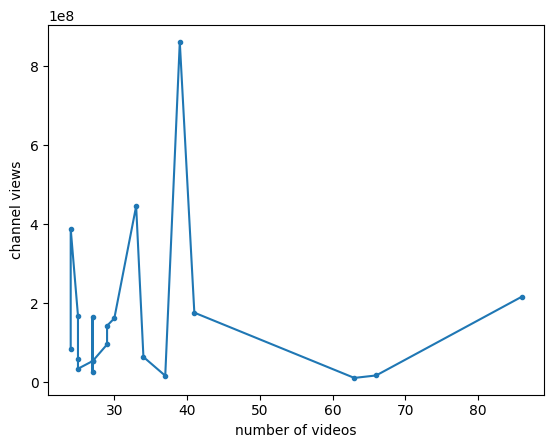

In [128]:
import matplotlib.pyplot as plt

plt.ylabel('channel views')
plt.xlabel('number of videos')

plt.plot('number of videos', 'chan views', data=df4.head(20), marker='.')
plt.show()

## Summary

Exploratory data analysis is important to understand your data. In creating the above examples, I double checked my results using a couple specific videos to verify that everything was working as I expected. Don't accept answers blindly! Bad data is worse than no data!

Duplicates:
- ``.drop_duplicates()``

Aggregation:
- ``.sum()``
- ``.mean()``
- ``.min()``
- ``.max()``
- ``.count()``
- etc

Groupby:
- ``.groupby(column_names)``
- ``.reset_index()``
- aggregation functions applied to each group